# Exploración Estadística

Este notebook analiza la estructura estadística del dataset `ventas_limpias_etiquetadas.csv`, describiendo variables numéricas y categóricas, distribuciones, correlaciones y medidas de tendencia central.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Cargar dataset
ruta = 'ventas_limpias_etiquetadas.csv'
df = pd.read_csv(ruta)
df.head()

,id,fecha,producto,categoria,ventas_mensuales,costos,anio,mes,rango_venta
0,1,2023-01-15,zapatos,NaN,200000,120000,2023,1,medio
1,2,2023-01-16,camisa,NaN,150000,80000,2023,1,bajo
2,3,2023-01-17,pantalón,NaN,180000,100000,2023,1,medio
3,4,2023-01-18,zapatos,NaN,210000,130000,2023,1,medio


In [23]:
# Valores únicos por columna
df.nunique()

id                  4
fecha               4
producto            3
categoria           1
ventas_mensuales    4
costos              4
anio                1
mes                 1
rango_venta         2
dtype: int64

In [8]:
df.describe()

,id,categoria,ventas_mensuales,costos,anio,mes
count,4.000000,0.0,4.000000,4.000000,4.0,4.0
mean,2.500000,NaN,185000.000000,107500.000000,2023.0,1.0
std,1.290994,NaN,26457.513111,22173.557826,0.0,0.0
min,1.000000,NaN,150000.000000,80000.000000,2023.0,1.0
25%,1.750000,NaN,172500.000000,95000.000000,2023.0,1.0
50%,2.500000,NaN,190000.000000,110000.000000,2023.0,1.0
75%,3.250000,NaN,202500.000000,122500.000000,2023.0,1.0
max,4.000000,NaN,210000.000000,130000.000000,2023.0,1.0


### Distribución de variables numéricas

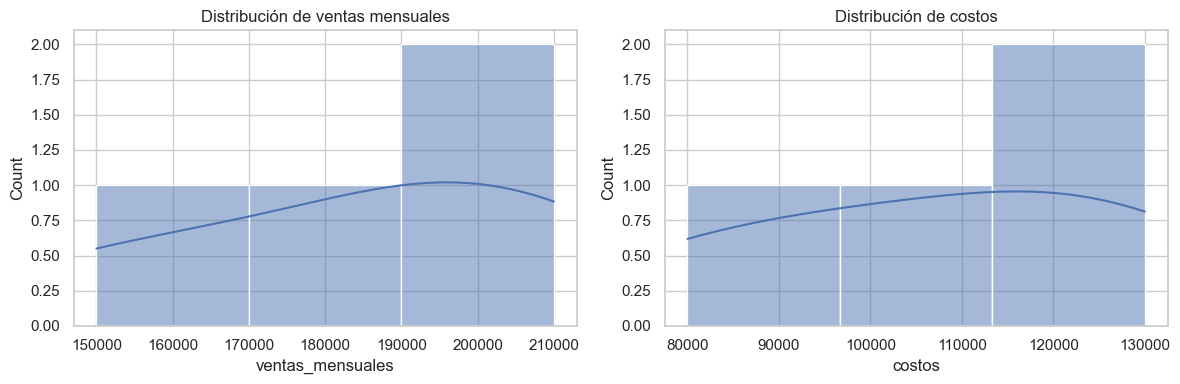

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['ventas_mensuales'], kde=True, ax=axs[0])
axs[0].set_title('Distribución de ventas mensuales')

sns.histplot(df['costos'], kde=True, ax=axs[1])
axs[1].set_title('Distribución de costos')

plt.tight_layout()
plt.show()

### Análisis de correlaciones

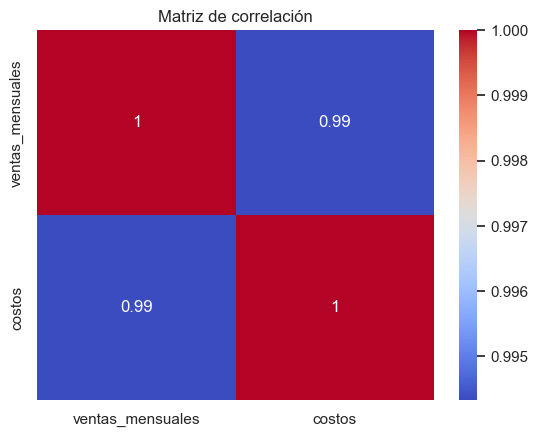

In [16]:
correlaciones = df[['ventas_mensuales', 'costos']].corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### Análisis cruzado: ventas vs categoría

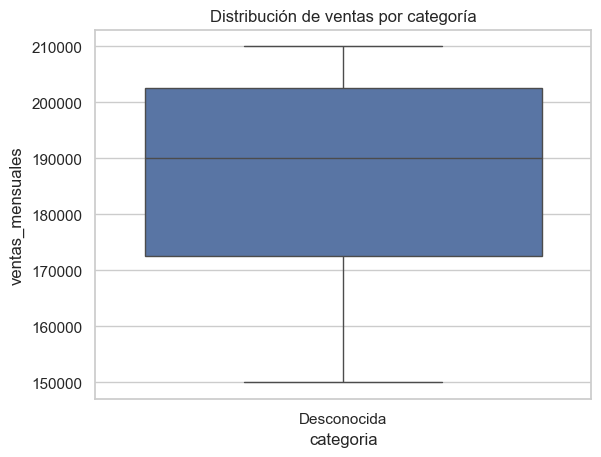

In [17]:
sns.boxplot(x='categoria', y='ventas_mensuales', data=df)
plt.title('Distribución de ventas por categoría')
plt.show()

### Estadísticas agrupadas por producto

In [18]:
df.groupby('producto')[['ventas_mensuales', 'costos']].agg(['mean', 'median', 'std'])

ventas_mensuales                           costos            \
                     mean    median          std      mean    median   
producto                                                               
camisa           150000.0  150000.0          NaN   80000.0   80000.0   
pantalón         180000.0  180000.0          NaN  100000.0  100000.0   
zapatos          205000.0  205000.0  7071.067812  125000.0  125000.0   

                       
                  std  
producto               
camisa            NaN  
pantalón          NaN  
zapatos   7071.067812

In [21]:
### Guardar estadísticas
# df.describe().to_csv('/mnt/data/estadisticas_basicas.csv')